In [36]:
from utils.Dataloader import load_movies,load_ratings,load_users
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
movies_df = load_movies('datasets/')
ratings_df = load_ratings('datasets/')
users_df = load_users('datasets/')

In [2]:
genres = movies_df['genres'].str.split('|', expand=True).stack()
genres.unique()

array(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western'], dtype=object)

In [3]:
display(movies_df)
display(ratings_df)
display(users_df)

,movieId,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


,userId,gender,age,Occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [39]:
recent_ratings

,userId,movieId,rating,timestamp
25,1,48,5,978824351
32,1,1566,4,978824330
34,1,1907,4,978824330
30,1,2294,4,978824291
4,1,2355,5,978824291
35,1,783,4,978824291
10,1,595,5,978824268
33,1,588,4,978824268
16,1,2687,3,978824268
29,1,745,3,978824268


In [47]:
# userId가 1인 유저의 최근 영화 10개를 뽑아내기 위해 ratings_df를 필터링하고 정렬합니다.
user_id = 1
recent_ratings = ratings_df[ratings_df['userId'] == user_id].sort_values(by='timestamp', ascending=False).head(10)

# 최근 영화 목록을 뽑아냅니다.
recent_movie_ids = recent_ratings['movieId'].tolist()

# 뽑아낸 영화 목록을 이용해 해당 영화의 정보를 movies_df에서 가져옵니다.
recent_movies = movies_df[movies_df['movieId'].isin(recent_movie_ids)]

# 최근 영화 목록을 출력합니다.
recent_movies
# 최근 영화 목록에서 장르 정보를 가져옵니다.
genres_list = recent_movies['genres'].str.split('|').explode()

# 각 장르의 개수를 세어 Series로 저장합니다.
genre_counts = genres_list.value_counts()

# 장르별 개수를 출력합니다.
genre_counts

genres
Animation     10
Children's     9
Musical        5
Comedy         4
Romance        1
Thriller       1
Adventure      1
Name: count, dtype: int64

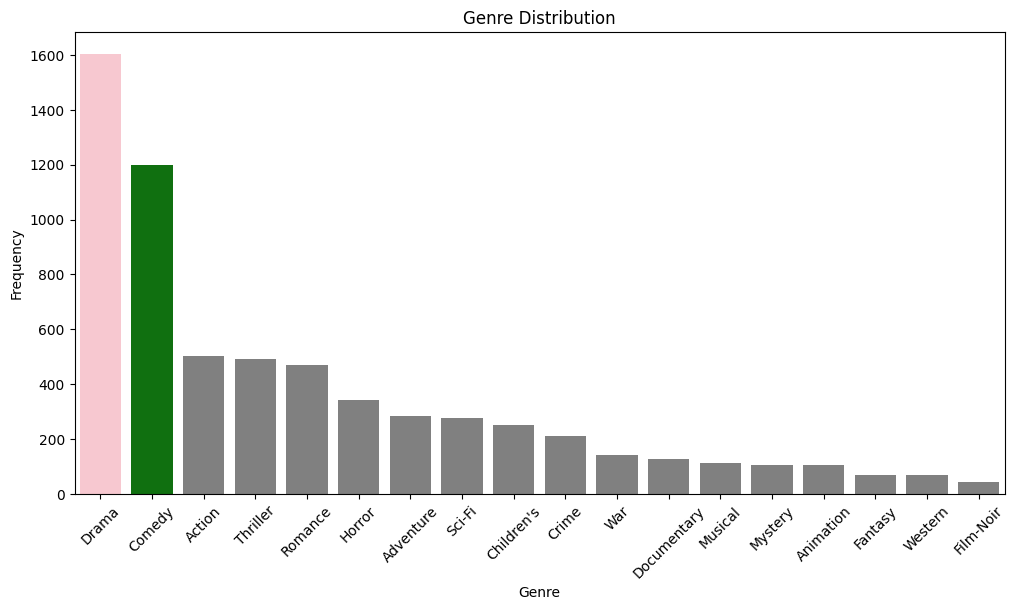

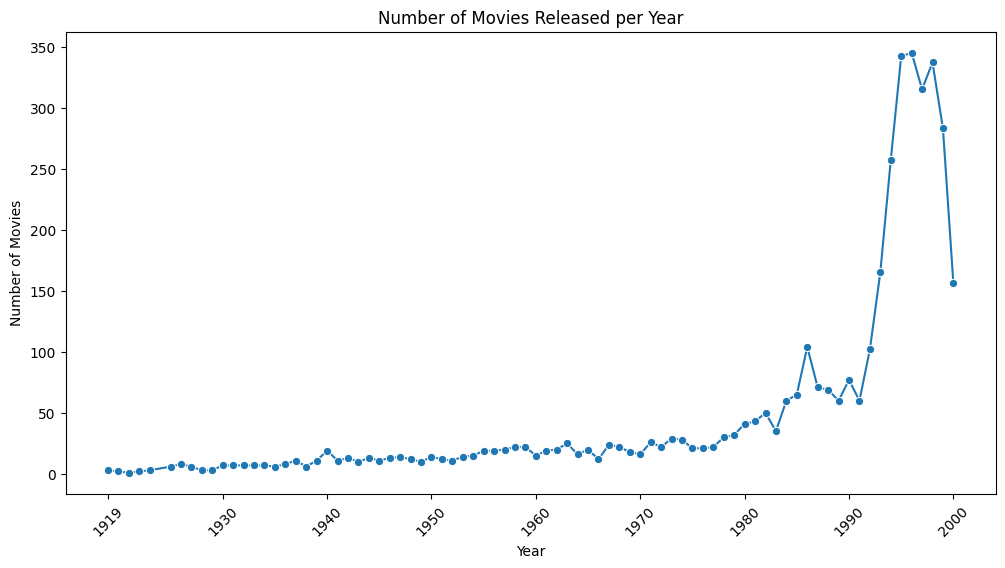

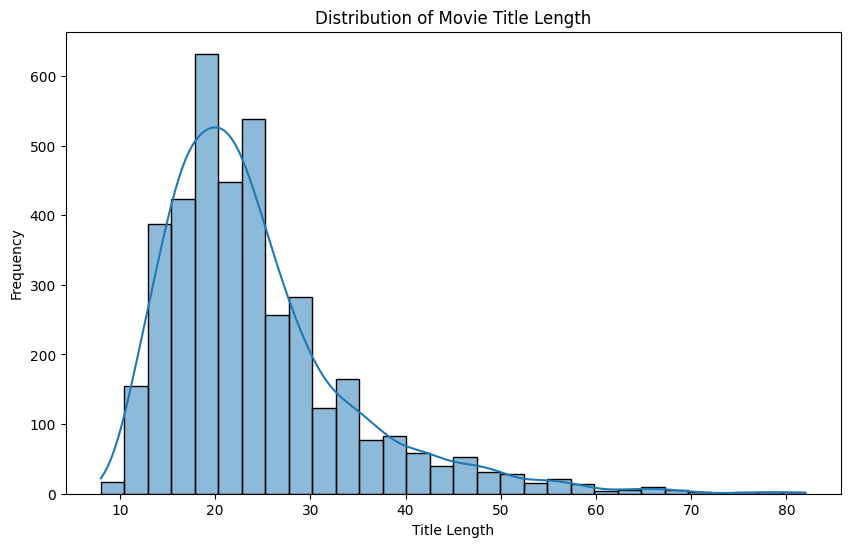

In [23]:
# 장르 분포 계산
genres = movies_df['genres'].str.split('|', expand=True).stack()
genre_counts = genres.value_counts()

# 색상 팔레트 설정
palette = ['green' if genre == 'Comedy' else 'pink' if genre == 'Drama' else 'gray' for genre in genre_counts.index]

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette=palette)
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Extracting year information
movies_df['year'] = movies_df['title'].str.extract(r'\((\d{4})\)')

# Converting year to numeric
movies_df['year'] = pd.to_numeric(movies_df['year'])

# Counting movies per year
yearly_movie_counts = movies_df['year'].value_counts().sort_index()

# Get the x values as 10-year intervals
x_values = yearly_movie_counts.index[::10]

# Visualization using line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_movie_counts.index, y=yearly_movie_counts.values, marker="o")
plt.title('Number of Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(x_values, x_values, rotation=45)
plt.show()

# 3. 영화 제목 길이 분포
movies_df['title_length'] = movies_df['title'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data=movies_df, x='title_length', bins=30, kde=True)
plt.title('Distribution of Movie Title Length')
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.show()

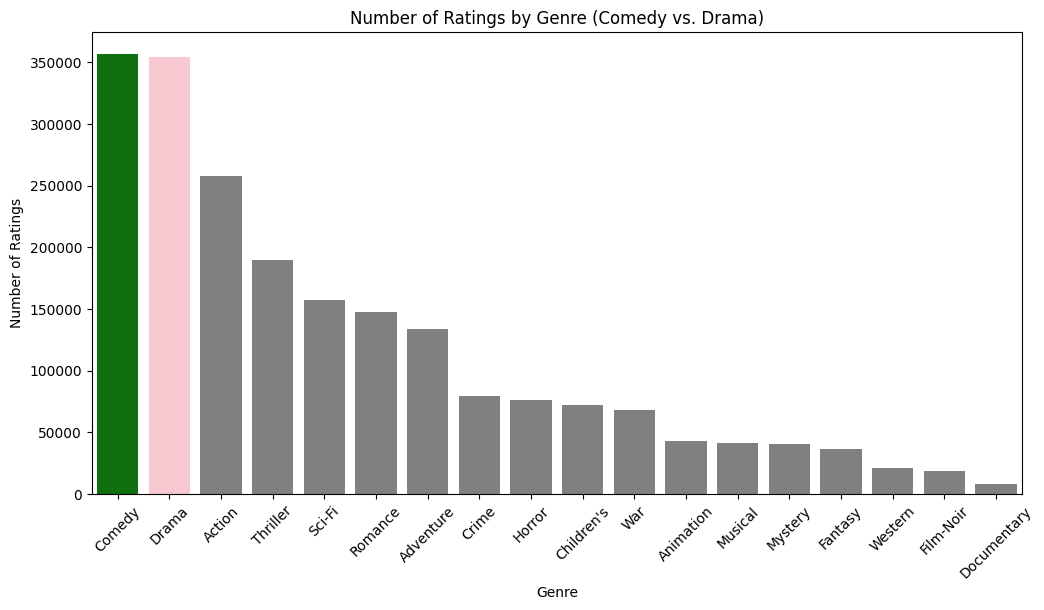

In [20]:
# movieId를 기준으로 movies_df와 ratings_df를 병합
merged_df = ratings_df.merge(movies_df, on='movieId')

# '|'로 구분된 장르를 분리
genres_split = merged_df['genres'].str.split('|', expand=True)

# 장르 정보를 확장한 데이터프레임과 ratings 정보 병합
merged_genres_ratings = pd.concat([merged_df, genres_split], axis=1)

# 장르 컬럼의 이름을 'genre1', 'genre2', ... 로 변경
merged_genres_ratings.columns = list(merged_df.columns) + ['genre' + str(i+1) for i in range(genres_split.shape[1])]

# 장르 열들을 'genre' 열로 unpivot
melted_genres_ratings = pd.melt(merged_genres_ratings, id_vars=['movieId', 'userId', 'rating'], value_vars=['genre1', 'genre2', 'genre3', 'genre4', 'genre5'], value_name='genre')

# 별점 평균과 별점 수 계산
genre_ratings_stats = melted_genres_ratings.groupby('genre').agg({'rating': ['mean', 'count']})
# 별점 수 기준으로 장르 정렬
genre_ratings_stats = genre_ratings_stats.sort_values(('rating', 'count'), ascending=False)

# 코메디(Comedy)와 드라마(Drama) 장르만 선택
filtered_genre_ratings_stats = genre_ratings_stats[genre_ratings_stats.index.isin(['Comedy', 'Drama'])]


# 다른 모든 장르에 대한 색상 설정 (남색과 초록)
palette = {genre: 'pink' if genre == 'Drama' else 'green' if genre == 'Comedy' else 'gray' for genre in genre_ratings_stats.index}

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_ratings_stats.index, y=genre_ratings_stats[('rating', 'count')], palette=palette)
plt.title('Number of Ratings by Genre (Comedy vs. Drama)')
plt.xlabel('Genre')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.show()

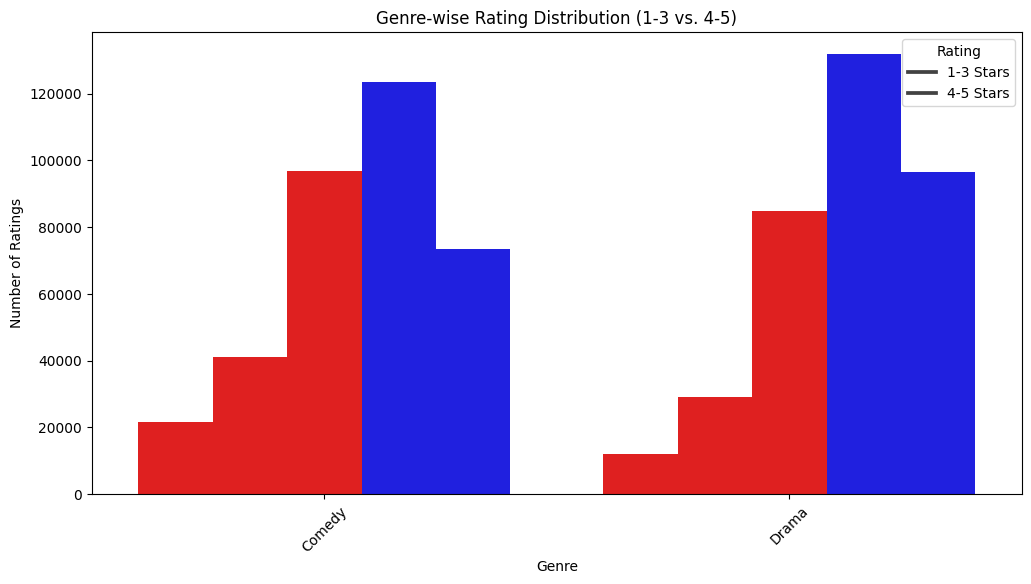

In [15]:
# Merge movies_df and ratings_df based on 'movieId'
merged_df = ratings_df.merge(movies_df, on='movieId')

# Split genres and create a new row for each genre
genre_split = merged_df['genres'].str.split('|', expand=True)
genre_df = pd.concat([merged_df, genre_split], axis=1)

# Melt the dataframe to create 'genre' column
melted_genre_df = pd.melt(genre_df, id_vars=['movieId', 'rating'], value_vars=list(genre_split.columns), value_name='genre')

# Count ratings for each genre and rating
genre_rating_count = melted_genre_df.groupby(['genre', 'rating']).size().reset_index(name='count')

# 코메디(Comedy)와 드라마(Drama) 장르만 선택
filtered_genre_rating_count = genre_rating_count[genre_rating_count['genre'].isin(['Comedy', 'Drama'])]

# 1, 2, 3점과 4, 5점을 두 묶음으로 표시할 팔레트 설정
palette = {1: 'red', 2: 'red', 3: 'red', 4: 'blue', 5: 'blue'}

plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_genre_rating_count, x='genre', y='count', hue='rating', palette=palette)
plt.title('Genre-wise Rating Distribution (1-3 vs. 4-5)')
plt.xlabel('Genre')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.legend(title='Rating', labels=['1-3 Stars', '4-5 Stars'])
plt.show()

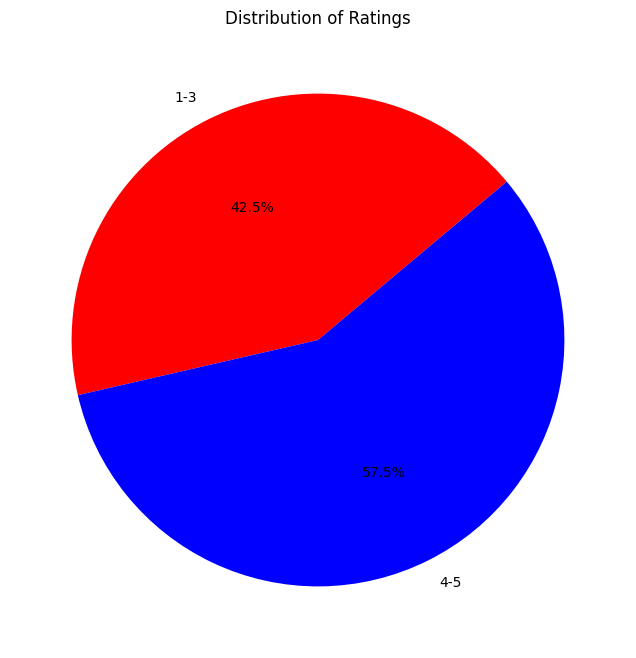

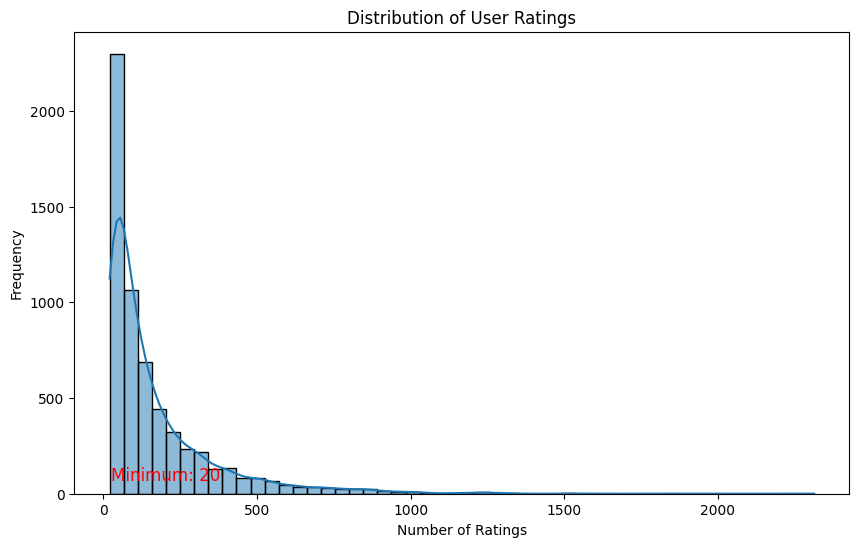

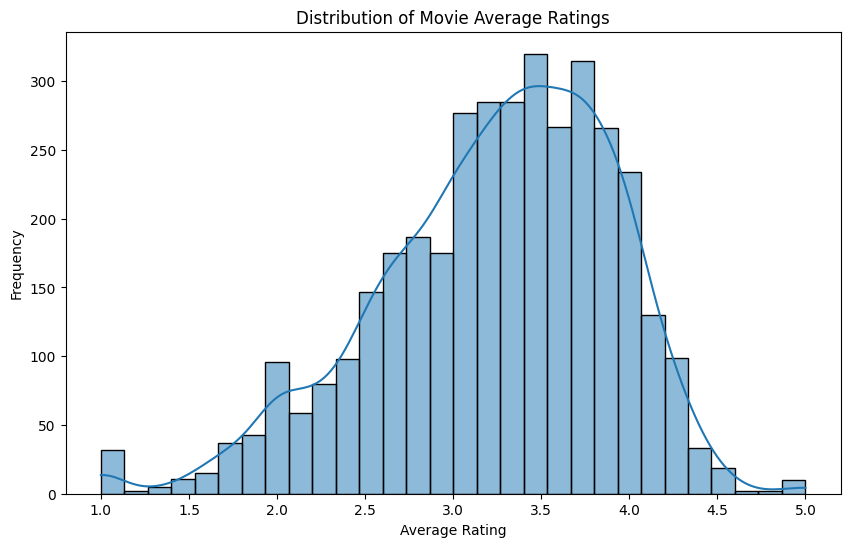

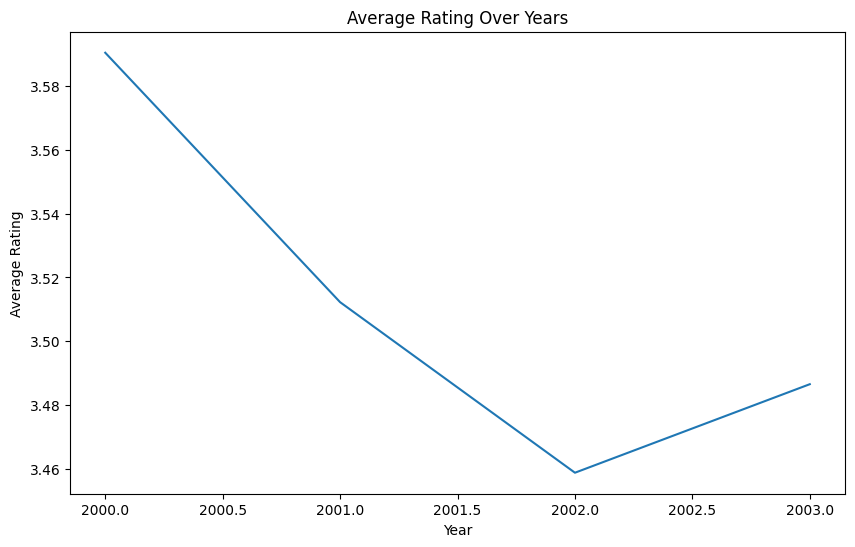

In [33]:
# Count the occurrences of each rating
rating_counts = ratings_df['rating'].value_counts()

# Combine 1, 2, and 3 ratings into '1-3'
rating_counts.loc['1-3'] = rating_counts.loc[1] + rating_counts.loc[2] + rating_counts.loc[3]

# Combine 4 and 5 ratings into '4-5'
rating_counts.loc['4-5'] = rating_counts.loc[4] + rating_counts.loc[5]

# Drop the individual rating counts
rating_counts.drop([1, 2, 3, 4, 5], inplace=True)

# Sort the index for plotting
sorted_index = sorted(rating_counts.index)

# Define colors for each rating category
colors = ['red' if rating in ['1-3'] else 'blue' for rating in sorted_index]

# Plotting a pie chart for rating distribution with custom colors and combined categories
plt.figure(figsize=(8, 8))
plt.pie(rating_counts[sorted_index], labels=sorted_index, autopct='%1.1f%%', startangle=40, colors=colors)
plt.title('Distribution of Ratings')
plt.show()
# 2. 사용자별 평점 수
# Calculate user rating counts
user_rating_counts = ratings_df['userId'].value_counts()

# Plotting the distribution of user ratings
plt.figure(figsize=(10, 6))
sns.histplot(data=user_rating_counts, bins=50, kde=True)
plt.title('Distribution of User Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')

# Displaying the minimum value as text
min_count = user_rating_counts.min()
plt.text(min_count + 5, 70, f'Minimum: {min_count}', color='red', fontsize=12)

plt.show()

# 3. 영화별 평점 평균
movie_avg_ratings = ratings_df.groupby('movieId')['rating'].mean()
plt.figure(figsize=(10, 6))
sns.histplot(data=movie_avg_ratings, bins=30, kde=True)
plt.title('Distribution of Movie Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

# 4. 시간에 따른 평점 변화
ratings_df['timestamp'] = pd.to_datetime(ratings_df['timestamp'], unit='s')
ratings_df['year'] = ratings_df['timestamp'].dt.year

avg_rating_by_year = ratings_df.groupby('year')['rating'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_rating_by_year)
plt.title('Average Rating Over Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()


In [8]:
# timestamp의 범위 계산
min_timestamp = ratings_df["timestamp"].min()
max_timestamp = ratings_df["timestamp"].max()

# 리뷰 수 계산
review_counts = ratings_df.groupby(pd.cut(ratings_df["timestamp"], bins=5)).size()

print("Timestamp Range:")
print("Min Timestamp:", min_timestamp)
print("Max Timestamp:", max_timestamp)

Timestamp Range:
Min Timestamp: 2000-04-25 23:05:32
Max Timestamp: 2003-02-28 17:49:50


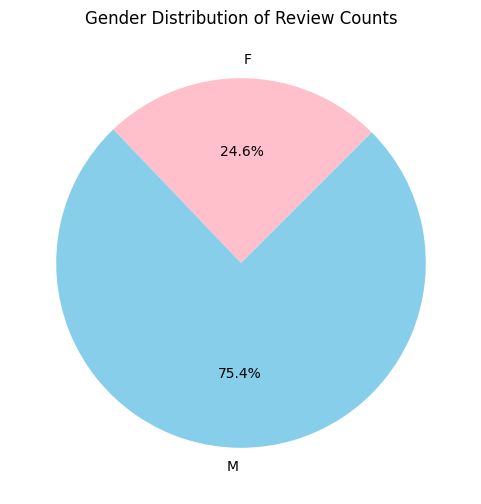

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# users_df: 사용자 정보가 담긴 데이터프레임
# ratings_df: 리뷰 정보가 담긴 데이터프레임 (userId, review 등)

# userId를 기준으로 users_df와 ratings_df를 합칩니다.
merged_df = ratings_df.merge(users_df, on='userId', how='left')

# 각 사용자의 성별과 작성한 리뷰 수를 계산합니다.
gender_review_counts = merged_df.groupby('gender')['userId'].count()

# 시각화를 위한 색상 설정
gender_colors = ['pink','skyblue']

# 파이 차트로 성별 및 리뷰 수 분포를 시각화합니다.
plt.figure(figsize=(6, 6))
plt.pie(gender_review_counts, labels=gender_review_counts.index, autopct='%1.1f%%', startangle=45, colors=gender_colors)
plt.title('Gender Distribution of Review Counts')
plt.show()

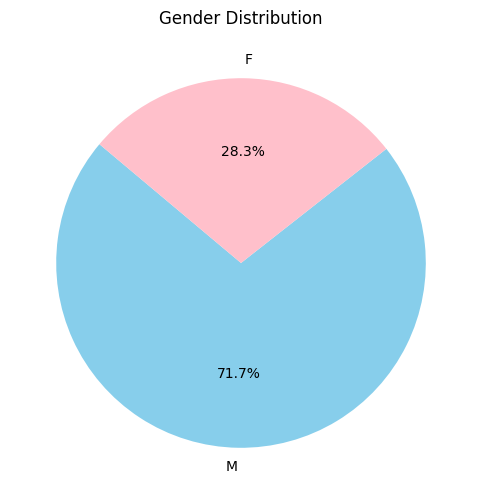

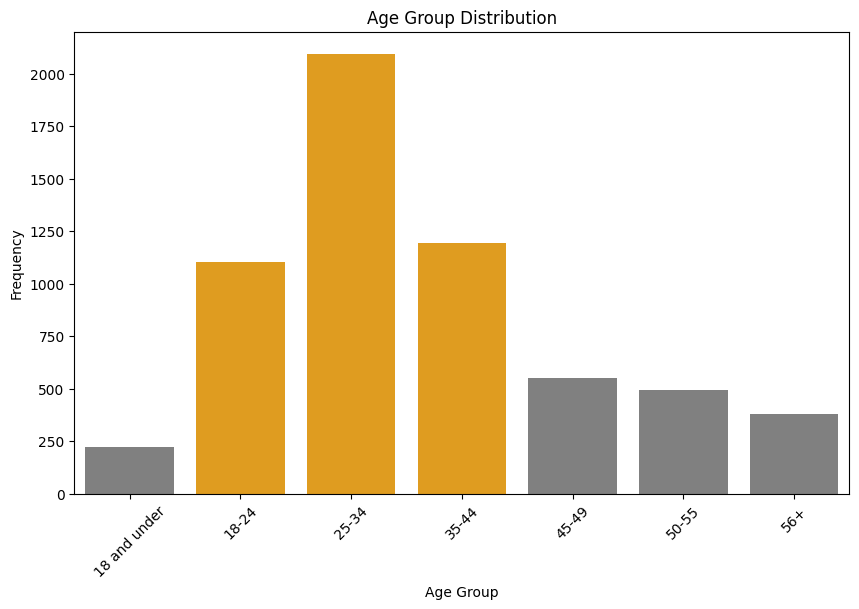

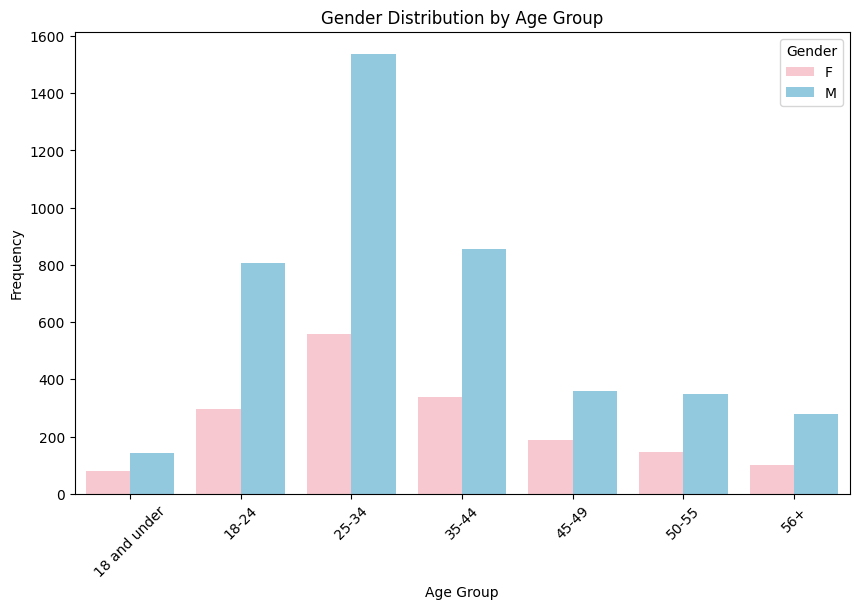

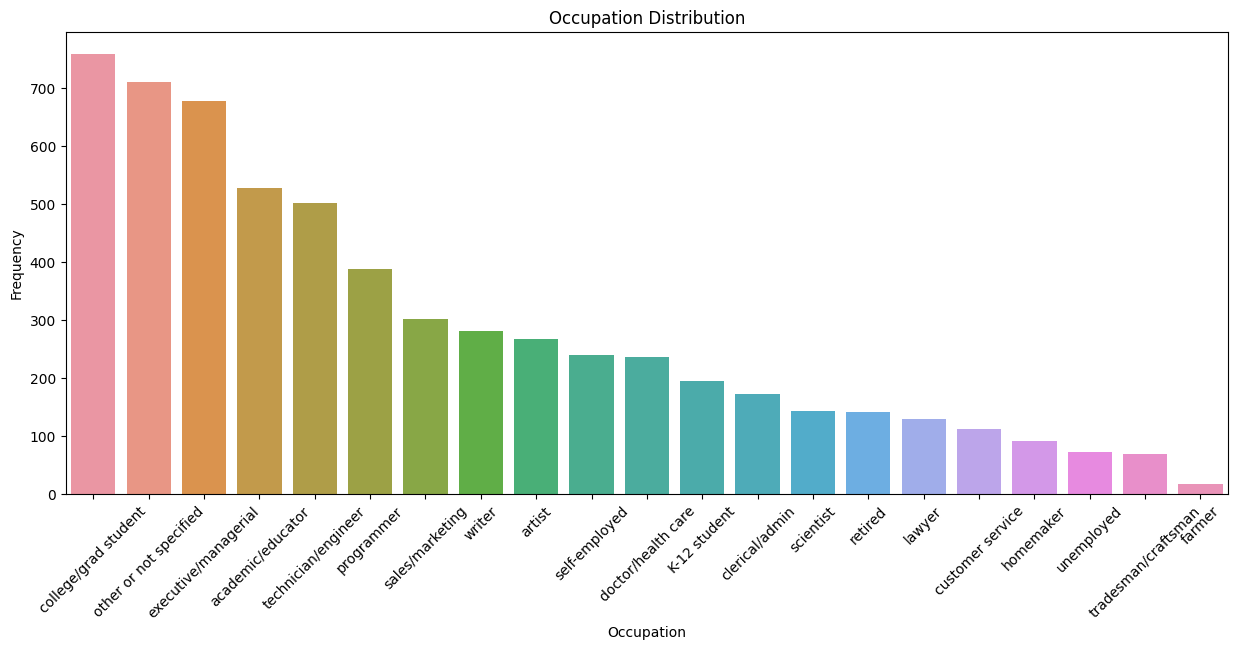

In [27]:
# Gender 분포
gender_counts = users_df['gender'].value_counts()
gender_colors = ['skyblue', 'pink']
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=gender_colors)
plt.title('Gender Distribution')
plt.show()

# Age 분포
age_mapping = {
    1: '18 and under',
    18: '18-24',
    25: '25-34',
    35: '35-44',
    45: '45-49',
    50: '50-55',
    56: '56+'
}
users_df['agegroup'] = users_df['age'].map(age_mapping)
age_group_counts = users_df['agegroup'].value_counts()

# age_mapping의 키 값으로 정렬
sorted_age_groups = sorted(age_mapping.values(), key=lambda x: list(age_mapping.values()).index(x))
age_group_counts = age_group_counts.reindex(sorted_age_groups)

# 시각화를 위한 색상 팔레트 설정
palette = ['orange' if age_group == '18-24' or age_group == '25-34' or age_group == '35-44' else 'gray' for age_group in age_group_counts.index]

plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette=palette)
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# 연령별 성별 분포
gender_colors = ['pink','skyblue']
plt.figure(figsize=(10, 6))
sns.countplot(data=users_df, x='agegroup', hue='gender', order=sorted_age_groups, palette=gender_colors)  # order 지정
plt.title('Gender Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

# Occupation 분포
occupation_mapping = {
    0: 'other or not specified',
    1: 'academic/educator',
    2: 'artist',
    3: 'clerical/admin',
    4: 'college/grad student',
    5: 'customer service',
    6: 'doctor/health care',
    7: 'executive/managerial',
    8: 'farmer',
    9: 'homemaker',
    10: 'K-12 student',
    11: 'lawyer',
    12: 'programmer',
    13: 'retired',
    14: 'sales/marketing',
    15: 'scientist',
    16: 'self-employed',
    17: 'technician/engineer',
    18: 'tradesman/craftsman',
    19: 'unemployed',
    20: 'writer'
}
users_df['OccupationLabel'] = users_df['Occupation'].map(occupation_mapping)
occupation_counts = users_df['OccupationLabel'].value_counts()
plt.figure(figsize=(15, 6))
sns.barplot(x=occupation_counts.index, y=occupation_counts.values)
plt.title('Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [11]:
# 25-34 세 그룹의 유저를 필터링
user_ids_25_to_34 = users_df[users_df['agegroup'] == '25-34']['userId'].unique()

# ratings_df에서 해당 유저들의 평가를 추출
ratings_25_to_34 = ratings_df[ratings_df['userId'].isin(user_ids_25_to_34)]

# 추출한 평가 중 유저들이 좋아하는 영화의 movieId를 추출
favorite_movie_ids = ratings_25_to_34.groupby('movieId')['rating'].mean().sort_values(ascending=False).index

# movies_df에서 해당 영화의 장르를 가져옵니다.
favorite_genres = []
for movie_id in favorite_movie_ids:
    movie_genres = movies_df[movies_df['movieId'] == movie_id]['genres'].values[0]
    favorite_genres.append(movie_genres)

# 선호 장르를 분석하여 순위를 생성합니다.
from collections import Counter
genre_counter = Counter(favorite_genres)
favorite_genre_ranking = genre_counter.most_common()

# 결과 출력
print("25-34 세 그룹의 유저가 가장 좋아하는 장르 순위:")
for i, (genre, count) in enumerate(favorite_genre_ranking, start=1):
    print(f"{i}. {genre}: {count}개")

25-34 세 그룹의 유저가 가장 좋아하는 장르 순위:
1. Drama: 690개
2. Comedy: 473개
3. Horror: 162개
4. Comedy|Drama: 144개
5. Comedy|Romance: 135개
6. Drama|Romance: 126개
7. Thriller: 95개
8. Documentary: 84개
9. Action: 59개
10. Drama|Thriller: 58개
11. Action|Thriller: 47개
12. Children's|Comedy: 46개
13. Drama|War: 41개
14. Crime|Drama: 40개
15. Animation|Children's: 35개
16. Action|Drama: 34개
17. Comedy|Drama|Romance: 33개
18. Romance: 33개
19. Horror|Sci-Fi: 33개
20. Comedy|Horror: 31개
21. Horror|Thriller: 31개
22. Action|Sci-Fi: 28개
23. Adventure|Children's: 28개
24. Western: 27개
25. Action|Adventure: 24개
26. Sci-Fi: 24개
27. Action|Comedy: 22개
28. Crime: 21개
29. Action|Adventure|Sci-Fi: 21개
30. Crime|Thriller: 20개
31. Mystery|Thriller: 20개
32. Animation|Children's|Musical: 19개
33. Drama|Mystery: 18개
34. Musical: 17개
35. Sci-Fi|Thriller: 17개
36. Action|War: 15개
37. Adventure: 14개
38. Comedy|Sci-Fi: 14개
39. Action|Sci-Fi|Thriller: 13개
40. Action|Drama|War: 13개
41. Comedy|Musical: 13개
42. Action|Crime: 12개
43. War: 11개


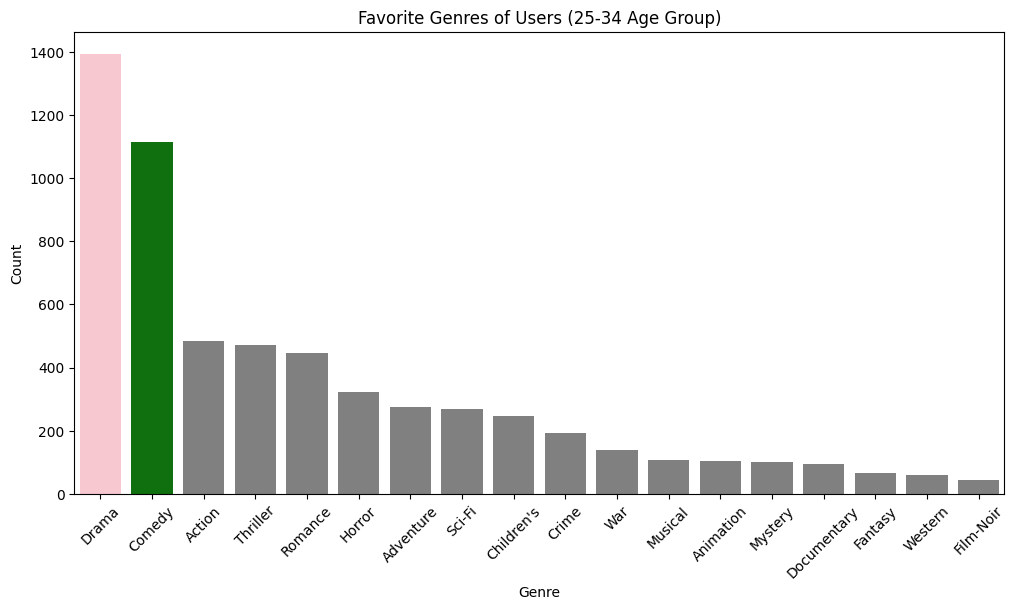

In [45]:
# '|'를 기준으로 장르를 분리하고 장르 리스트를 만듭니다.
favorite_genres_cleaned = []
for genre_list in favorite_genres:
    genres = genre_list.split('|')
    favorite_genres_cleaned.extend(genres)

# 장르 리스트에서 각 장르의 빈도를 계산합니다.
genre_counter = Counter(favorite_genres_cleaned)
favorite_genre_ranking = genre_counter.most_common()

# 시각화를 위한 데이터 프레임을 만듭니다.
genre_ranking_df = pd.DataFrame(favorite_genre_ranking, columns=['Genre', 'Count'])

# 색상 팔레트 설정
palette = ['green' if genre == 'Comedy' else 'pink' if genre == 'Drama' else 'gray' for genre in genre_ranking_df['Genre']]

plt.figure(figsize=(12, 6))  # 가로와 세로 크기를 바꿔줍니다.
sns.barplot(x='Genre', y='Count', data=genre_ranking_df, palette=palette)
plt.title('Favorite Genres of Users (25-34 Age Group)')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()